In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 16

In [3]:
file_name = 'wheat_12_var_avg_new'

In [4]:
from enum import Enum

class filter_method(Enum):
    none = 0
    snv = 1
    msc = 2
    savgol = 3

FILT = 1
FILTER = filter_method(FILT).name

# to be set if filter chosen is savgol
WINDOW = 7
ORDER = 2
DERIVATIVE = 1

#will be used for test dataset in msc
reference= None

In [5]:
def dataset_file_name(file_name):
    name = "./dataset/"+str(file_name)
    if FILT != 0:
        name+="_FILTER_"+str(FILTER)
    if FILTER == "savgol":
        name+="_WINDOW_"+str(WINDOW)+"_ORDER_"+str(ORDER)+"_DERIVATIVE_"+str(DERIVATIVE)
    return name

In [6]:
DATASET_FILE_NAME = dataset_file_name(file_name)
X_train_file = DATASET_FILE_NAME+"_train_dataset.npy"
y_train_file = DATASET_FILE_NAME+"_train_dataset_label.npy"
X_test_file = DATASET_FILE_NAME+"_test_dataset.npy"
y_test_file = DATASET_FILE_NAME+"_test_dataset_label.npy"

In [7]:
X_train =  np.load(X_train_file)
y_train =  np.load(y_train_file)
X_test  =  np.load(X_test_file)
y_test  =  np.load(y_test_file)

In [8]:
y_set = set(y_train)

In [9]:
NUM_OF_CLASSES = len(y_set)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_test.shape)

(19353, 147, 1)
(4839, 147, 1)


In [11]:
import keras
from keras import Sequential
from keras.layers import Input, Conv1D, Flatten, Dense, MaxPooling1D

In [12]:
def createModel(input_shape,num_classes):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=5, input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=5 ))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
    
    return model

In [13]:
model = createModel(X_train.shape[1:],NUM_OF_CLASSES)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 143, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 28, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 1000)              897000    
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 901,196
Trainable params: 901,196
Non-trainable params: 0
__________________________________________________

In [15]:
train_eva = []
test_eva = []

In [16]:
history_dataframe = pd.DataFrame() 

In [17]:
for x in range(400):
    print("\nEpoch: ",x+1)
    history = model.fit(X_train ,y_train ,batch_size=BATCH_SIZE ,epochs=1, verbose=2, shuffle=True)
    if history_dataframe.size == 0:
        history_dataframe = pd.DataFrame.from_dict(history.history)
    else:
        history_dataframe = pd.concat([history_dataframe,pd.DataFrame.from_dict(history.history)],axis=0,ignore_index=True)
    
    print("for training")
    train_eva.append(model.evaluate(X_train,y_train))
    print("for testing")
    test_eva.append(model.evaluate(X_test, y_test))


Epoch:  1
1210/1210 - 19s - loss: 1.3084 - accuracy: 0.3618 - 19s/epoch - 16ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 1.1442 - accuracy: 0.5193
for testing
152/152 [==============================] - 1s 4ms/step - loss: 1.1459 - accuracy: 0.5224

Epoch:  2
1210/1210 - 16s - loss: 0.9679 - accuracy: 0.5825 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.7741 - accuracy: 0.6758
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.7687 - accuracy: 0.6789

Epoch:  3
1210/1210 - 15s - loss: 0.6839 - accuracy: 0.7198 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.6418 - accuracy: 0.7209
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.7138

Epoch:  4
1210/1210 - 16s - loss: 0.5737 - accuracy: 0.7655 - 16s/epoch - 13ms/step
for training
605/605 [=============================

605/605 [==============================] - 2s 4ms/step - loss: 0.0930 - accuracy: 0.9672
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0963 - accuracy: 0.9673

Epoch:  30
1210/1210 - 15s - loss: 0.1070 - accuracy: 0.9629 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0891 - accuracy: 0.9695
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0966 - accuracy: 0.9671

Epoch:  31
1210/1210 - 15s - loss: 0.1007 - accuracy: 0.9644 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0914 - accuracy: 0.9701
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0935 - accuracy: 0.9696

Epoch:  32
1210/1210 - 15s - loss: 0.0968 - accuracy: 0.9664 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0810 - accuracy: 0.9726
for testing
152/152 [=======================

152/152 [==============================] - 1s 4ms/step - loss: 0.0542 - accuracy: 0.9804

Epoch:  58
1210/1210 - 15s - loss: 0.0521 - accuracy: 0.9816 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9877
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0485 - accuracy: 0.9843

Epoch:  59
1210/1210 - 15s - loss: 0.0584 - accuracy: 0.9805 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9579
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.1136 - accuracy: 0.9618

Epoch:  60
1210/1210 - 15s - loss: 0.0533 - accuracy: 0.9811 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0648 - accuracy: 0.9761
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9707

Epoch:  61
1210/1210 - 15s - loss: 0.0551 -

1210/1210 - 15s - loss: 0.0393 - accuracy: 0.9864 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0310 - accuracy: 0.9897
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0478 - accuracy: 0.9833

Epoch:  87
1210/1210 - 15s - loss: 0.0416 - accuracy: 0.9865 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9839
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9777

Epoch:  88
1210/1210 - 15s - loss: 0.0383 - accuracy: 0.9871 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0445 - accuracy: 0.9832
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9820

Epoch:  89
1210/1210 - 16s - loss: 0.0388 - accuracy: 0.9865 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 

605/605 [==============================] - 2s 4ms/step - loss: 0.0225 - accuracy: 0.9929
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0394 - accuracy: 0.9868

Epoch:  115
1210/1210 - 15s - loss: 0.0277 - accuracy: 0.9903 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0585 - accuracy: 0.9782
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0839 - accuracy: 0.9696

Epoch:  116
1210/1210 - 15s - loss: 0.0285 - accuracy: 0.9896 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0136 - accuracy: 0.9959
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.9888

Epoch:  117
1210/1210 - 15s - loss: 0.0304 - accuracy: 0.9891 - 15s/epoch - 12ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0378 - accuracy: 0.9867
for testing
152/152 [====================

605/605 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9957
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0372 - accuracy: 0.9893

Epoch:  143
1210/1210 - 15s - loss: 0.0264 - accuracy: 0.9912 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0107 - accuracy: 0.9967
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0290 - accuracy: 0.9907

Epoch:  144
1210/1210 - 15s - loss: 0.0230 - accuracy: 0.9923 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9855
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9783

Epoch:  145
1210/1210 - 15s - loss: 0.0247 - accuracy: 0.9915 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0135 - accuracy: 0.9952
for testing
152/152 [====================

605/605 [==============================] - 3s 4ms/step - loss: 0.0207 - accuracy: 0.9927
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9870

Epoch:  171
1210/1210 - 16s - loss: 0.0179 - accuracy: 0.9933 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9899
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9835

Epoch:  172
1210/1210 - 15s - loss: 0.0193 - accuracy: 0.9929 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.9981
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9913

Epoch:  173
1210/1210 - 16s - loss: 0.0187 - accuracy: 0.9936 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0653 - accuracy: 0.9758
for testing
152/152 [====================

605/605 [==============================] - 2s 4ms/step - loss: 0.0139 - accuracy: 0.9948
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9895

Epoch:  199
1210/1210 - 15s - loss: 0.0160 - accuracy: 0.9948 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0070 - accuracy: 0.9979
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9905

Epoch:  200
1210/1210 - 16s - loss: 0.0167 - accuracy: 0.9941 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.9976
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0358 - accuracy: 0.9899

Epoch:  201
1210/1210 - 15s - loss: 0.0173 - accuracy: 0.9943 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0138 - accuracy: 0.9946
for testing
152/152 [====================

605/605 [==============================] - 2s 4ms/step - loss: 0.0330 - accuracy: 0.9885
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0663 - accuracy: 0.9814

Epoch:  227
1210/1210 - 15s - loss: 0.0144 - accuracy: 0.9946 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0413 - accuracy: 0.9855
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9777

Epoch:  228
1210/1210 - 16s - loss: 0.0148 - accuracy: 0.9945 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0067 - accuracy: 0.9981
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.9919

Epoch:  229
1210/1210 - 15s - loss: 0.0117 - accuracy: 0.9960 - 15s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9984
for testing
152/152 [====================

605/605 [==============================] - 3s 5ms/step - loss: 0.0077 - accuracy: 0.9978
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9895

Epoch:  255
1210/1210 - 17s - loss: 0.0127 - accuracy: 0.9952 - 17s/epoch - 14ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9990
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9926

Epoch:  256
1210/1210 - 16s - loss: 0.0107 - accuracy: 0.9960 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0055 - accuracy: 0.9986
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0315 - accuracy: 0.9899

Epoch:  257
1210/1210 - 16s - loss: 0.0150 - accuracy: 0.9951 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0037 - accuracy: 0.9991
for testing
152/152 [====================

605/605 [==============================] - 3s 5ms/step - loss: 0.0018 - accuracy: 0.9996
for testing
152/152 [==============================] - 1s 5ms/step - loss: 0.0256 - accuracy: 0.9924

Epoch:  283
1210/1210 - 17s - loss: 0.0080 - accuracy: 0.9972 - 17s/epoch - 14ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9984
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0308 - accuracy: 0.9903

Epoch:  284
1210/1210 - 16s - loss: 0.0094 - accuracy: 0.9964 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0023 - accuracy: 0.9996
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0278 - accuracy: 0.9909

Epoch:  285
1210/1210 - 17s - loss: 0.0156 - accuracy: 0.9943 - 17s/epoch - 14ms/step
for training
605/605 [==============================] - 3s 5ms/step - loss: 0.0044 - accuracy: 0.9987
for testing
152/152 [====================

605/605 [==============================] - 3s 4ms/step - loss: 0.0194 - accuracy: 0.9929
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9878

Epoch:  311
1210/1210 - 16s - loss: 0.0077 - accuracy: 0.9974 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.9949
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9874

Epoch:  312
1210/1210 - 16s - loss: 0.0169 - accuracy: 0.9951 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0104 - accuracy: 0.9957
for testing
152/152 [==============================] - 1s 5ms/step - loss: 0.0425 - accuracy: 0.9878

Epoch:  313
1210/1210 - 16s - loss: 0.0076 - accuracy: 0.9969 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 0.0272 - accuracy: 0.9911
for testing
152/152 [====================

605/605 [==============================] - 2s 4ms/step - loss: 0.0013 - accuracy: 0.9997
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9930

Epoch:  339
1210/1210 - 16s - loss: 0.0112 - accuracy: 0.9964 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 2s 4ms/step - loss: 9.8070e-04 - accuracy: 1.0000
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0259 - accuracy: 0.9924

Epoch:  340
1210/1210 - 16s - loss: 0.0051 - accuracy: 0.9981 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0165 - accuracy: 0.9940
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0495 - accuracy: 0.9868

Epoch:  341
1210/1210 - 16s - loss: 0.0140 - accuracy: 0.9952 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0025 - accuracy: 0.9994
for testing
152/152 [================

605/605 [==============================] - 3s 5ms/step - loss: 0.0013 - accuracy: 0.9997
for testing
152/152 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9932

Epoch:  367
1210/1210 - 17s - loss: 0.0094 - accuracy: 0.9970 - 17s/epoch - 14ms/step
for training
605/605 [==============================] - 3s 5ms/step - loss: 0.0197 - accuracy: 0.9918
for testing
152/152 [==============================] - 1s 5ms/step - loss: 0.0607 - accuracy: 0.9839

Epoch:  368
1210/1210 - 17s - loss: 0.0098 - accuracy: 0.9963 - 17s/epoch - 14ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 0.9982
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9926

Epoch:  369
1210/1210 - 16s - loss: 0.0016 - accuracy: 0.9997 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 0.9994
for testing
152/152 [====================

605/605 [==============================] - 3s 4ms/step - loss: 0.0086 - accuracy: 0.9966
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0395 - accuracy: 0.9878

Epoch:  395
1210/1210 - 16s - loss: 0.0124 - accuracy: 0.9961 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 6.2572e-04 - accuracy: 0.9999
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9913

Epoch:  396
1210/1210 - 16s - loss: 0.0133 - accuracy: 0.9961 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.9917
for testing
152/152 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9870

Epoch:  397
1210/1210 - 16s - loss: 0.0033 - accuracy: 0.9991 - 16s/epoch - 13ms/step
for training
605/605 [==============================] - 3s 4ms/step - loss: 0.0013 - accuracy: 0.9997
for testing
152/152 [================

In [18]:
history_dataframe

,loss,accuracy
0,1.308394,0.361753
1,0.967880,0.582494
2,0.683898,0.719785
3,0.573747,0.765463
4,0.496719,0.805353
...,...,...
395,0.013268,0.996073
396,0.003287,0.999122
397,0.009484,0.996590
398,0.006508,0.998191


In [19]:
train_eva_df = pd.DataFrame(train_eva,columns=['loss','accuracy'])
test_eva_df = pd.DataFrame(test_eva,columns=['loss','accuracy'])

In [20]:
def plot_graph(df,title,xlabel,ylabel,values=['loss'],legends=[]):
    
    for value in values:
        epoch_count = range(1, len(df.index) + 1)
        plt.plot(epoch_count, df[value].tolist())
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if legends==[]:
        legends = values
    plt.legend(legends, loc='upper left')
    plt.show()

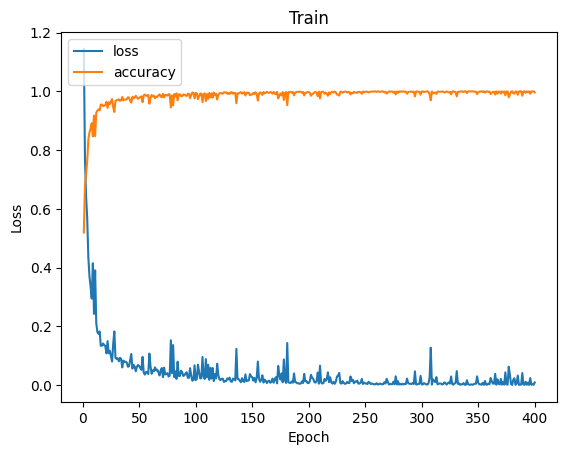

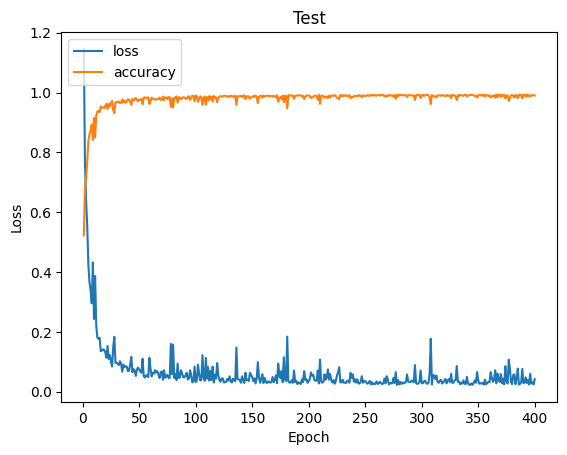

In [21]:
plot_graph(train_eva_df,'Train','Epoch','Loss',['loss','accuracy'])
plot_graph(test_eva_df,'Test','Epoch','Loss',['loss','accuracy'])

In [22]:
train_eva_df['accuracy'].max()

1.0

In [23]:
train_eva_df.idxmax()

loss          0
accuracy    338
dtype: int64

In [24]:
test_eva_df['accuracy'].max()

0.9933870434761047

In [25]:
test_eva_df.idxmax()

loss          0
accuracy    354
dtype: int64